# Fortini & Petrone - Example 3.4

## Situation

$X_i \mid \mu \sim^{idd} \mathcal{N}(\mu, \sigma^2)$ with $\mu$ being a realisation of $\tilde{\mu} \sim \mathcal{N}(0, 1)$, $\sigma^2$ being a constant.

For $m$ a measure, we define the sufficient statistic $T(m) = \int x dm(x) = \mathbb{E}_m[X]$

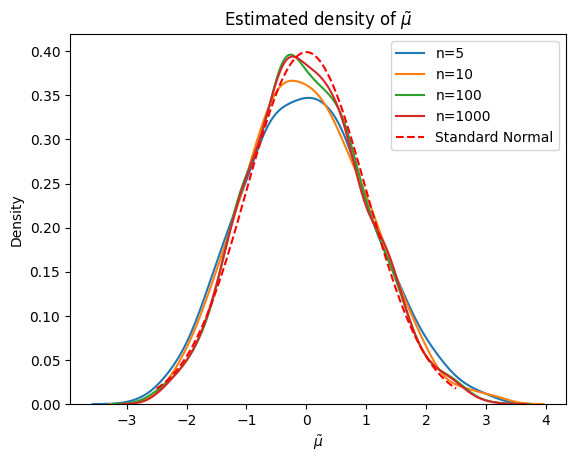

L2 distance for n=5: 0.09683516646641312
L2 distance for n=10: 0.09108621508701824
L2 distance for n=100: 0.07790162806958507
L2 distance for n=1000: 0.09182251175465746


In [ ]:
import numpy as np
from collections import defaultdict

# Simulation of a Gaussian model
iter = 1000
Tn_dict = defaultdict(list)
std_normal = []  # dict to store the standard normal distribution values under the same random state (i.e. fixed $\omega \in \Omega$)
mu_0 = 0
sig2_0 = 1
nn = [5, 10, 100, 1000]

for i in range(iter):
    np.random.seed(i+34789)
    #simulating the data
    mu = np.random.normal(mu_0, sig2_0)
    sigma2 = 1
    data = np.random.normal(mu, sigma2, max(nn))  # with fixed seed, we are increasing the number of observations but the first remain the same
    for n in nn:
        X = data[:n]
        t = np.mean(X)
        Tn_dict[n].append(t)
        # q = lambda x: np.normal.cdf(x, n*t/(n+1), (2+n)/(1+n))

#compare the ecdf of Tn with the standard normal distribution (the dist of $\tilde{mu}$)
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from src.utils import wasserstein_distance

plt.figure()
for n in nn:
    sns.kdeplot(Tn_dict[n], label=f'n={n}')
x = np.linspace(-2.5, 2.5, iter)
y = stats.norm.pdf(x, mu_0, np.sqrt(sig2_0))
plt.plot(x, y, color='red', linestyle='--', label='Standard Normal')
plt.legend()
plt.xlabel(r'$\tilde{\mu}$')
plt.ylabel('Density')
plt.title(r'Estimated density of $\tilde{\mu}$')
plt.show() 

# Printing Wasserstein and L2 distances
for n in nn:
    # Calculate the Wasserstein distance
    # w_distance = wasserstein_distance(Tn_dict[n], np.random.normal(mu_0, np.sqrt(sig2_0), iter))  # note the order does not matter
    # print(f"Wasserstein distance for n={n}: {w_distance}")

    # Calculate the L2 distance
    l2_distance = np.linalg.norm(np.sort(Tn_dict[n]) - np.sort(np.random.normal(mu_0, np.sqrt(sig2_0), iter)))/ np.sqrt(iter)
    print(f"L2 distance for n={n}: {l2_distance}")




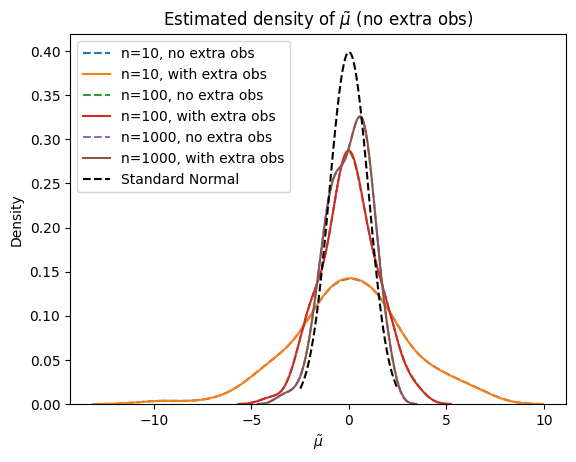

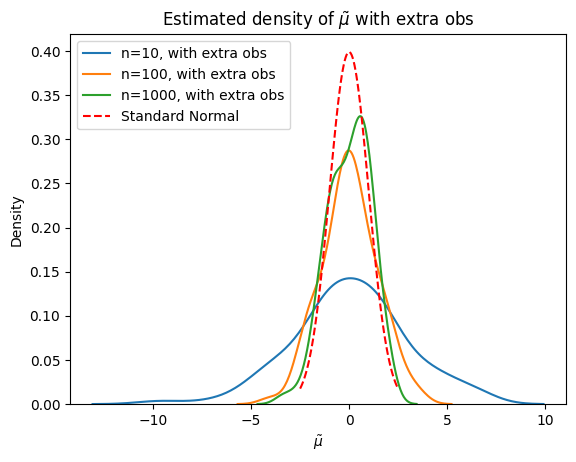

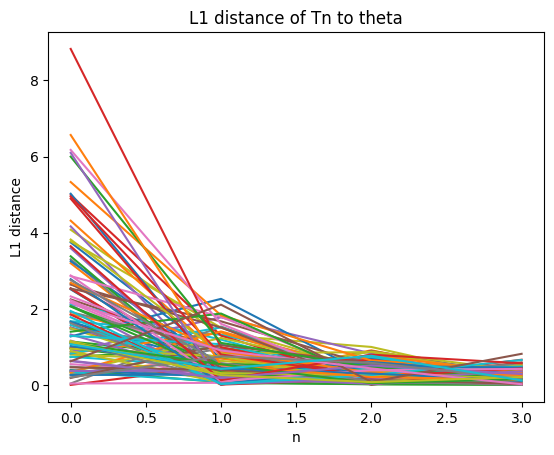

In [65]:
from encodings.punycode import T
import numpy as np
from collections import defaultdict

# Simulation of a Gaussian model
iter = 100
Tn_dict = defaultdict(list)  # results with no extra observations
Tn_dict1000 = defaultdict(list)  # results with simulated extra observations
Tn_diff_to_theta = defaultdict(list)  # Viewing the L1 distance for every iteration (i.e. every omega)
std_normal = []  # dict to store the standard normal distribution values under the same random state (i.e. fixed $\omega \in \Omega$)
mu_0 = 0
sig2_0 = 1
# nn = 1000
n_extra = 5000

for i in range(iter):
    #simulating the data
    mu = np.random.normal(mu_0, sig2_0)
    sigma2 = 9
    for nn in [10, 100, 500, 1000]:
        X_obs = np.random.normal(mu, sigma2, nn)
        t_obs = np.mean(X_obs)
        Tn_dict[nn].append(t_obs)  # storing the result with no extra observations

        # Generating new observations and updating the observed mean
        for s in range(n_extra):
            X_new = np.random.normal(t_obs*(nn+s)/(nn+s+1), (2+n+s)/(1+n+s))  # simulate X_{n+1} \sim P(X_{n+1} | X_1, \ldots, X_n)
            t_obs = ((n+s-1)*t_obs + X_new)/(n+s)  # t = Tn(X_1, \ldots, X_n), i.e. the empirical mean
        Tn_dict1000[nn].append(t_obs)  # storing results with extra observations
        Tn_diff_to_theta[i].append(np.abs(t_obs - mu))  # storing the difference to theta
    

#compare the ecdf of Tn with the standard normal distribution (the dist of $\tilde{mu}$)
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from src.utils import wasserstein_distance

plt.figure()
for n in [10, 100, 1000]:
    sns.kdeplot(Tn_dict[n], label=f'n={n}, no extra obs', linestyle='--')
    sns.kdeplot(Tn_dict1000[n], label=f'n={n}, with extra obs')
x = np.linspace(-2.5, 2.5, iter)
y = stats.norm.pdf(x, mu_0, np.sqrt(sig2_0))
plt.plot(x, y, color='black', linestyle='--', label='Standard Normal')
plt.legend()
plt.xlabel(r'$\tilde{\mu}$')
plt.ylabel('Density')
plt.title(r'Estimated density of $\tilde{\mu}$ (no extra obs)')
plt.show() 

plt.figure()
for n in [10, 100, 1000]:
    sns.kdeplot(Tn_dict1000[n], label=f'n={n}, with extra obs')
x = np.linspace(-2.5, 2.5, iter)
y = stats.norm.pdf(x, mu_0, np.sqrt(sig2_0))
plt.plot(x, y, color='red', linestyle='--', label='Standard Normal')
plt.legend()
plt.xlabel(r'$\tilde{\mu}$')
plt.ylabel('Density')
plt.title(r'Estimated density of $\tilde{\mu}$ with extra obs')
plt.show()
# # Printing Wasserstein and L2 distances
# for n in nn:
#     # Calculate the Wasserstein distance
#     # w_distance = wasserstein_distance(Tn_dict[n], np.random.normal(mu_0, np.sqrt(sig2_0), iter))  # note the order does not matter
#     # print(f"Wasserstein distance for n={n}: {w_distance}")

#     # Calculate the L2 distance
#     l2_distance = np.linalg.norm(np.sort(Tn_dict[n]) - np.sort(np.random.normal(mu_0, np.sqrt(sig2_0), iter)))/ np.sqrt(iter)
#     print(f"L2 distance for n={n}: {l2_distance}")

# Printing the the normalized L1 distance of Tn to theta
plt.figure()
for i in range(iter):
    plt.plot(Tn_diff_to_theta[i], label=f'iter {i}')
plt.xlabel('n')
plt.ylabel('L1 distance')
plt.title('L1 distance of Tn to theta')
plt.show()


# convergence of predictives in exchangeable data
We recall that for exchangeable data, we have the following:
- $\hat{F}_n \to \tilde{F}$
- $P_n \to \tilde{F}$, where $P_n \equiv \mathbb{P}(X_{n+1} \in \cdot \mid X_{1:n})$

Thus, for large $n$, we have that $P_n \approx \tilde{F} \approx \hat{F}_n$.

To test this we do the following:
- Fix a distribution $\pi$ of a random measure $\tilde{F}$.
- Generate exchangeable data $X_1, \ldots, X_n$ from $\tilde{F}$, i.e. generate $F$ a realisation of $\tilde{F} \sim \pi$ and then generate $X_i \sim^{iid} F$.
- What is the distribution of $X_{n+1}$ given $X_1, \ldots, X_n$? We estimate the real dist by sampling multiple values of $X_{n+1}$ and compare it with the value of $\hat{F}_n$. Note that by
exchangeability, it is enough to generate $X_1, ..., X_{n+m}$ and use $n$ for the first estimation and $m$ for the second estimation.

We know that $T_n = T(\hat{F}_n)$ converges $\mathbb{P}$-a.s. to $T(\tilde{F}) = \tilde{\theta} = \tilde{\mu}$. In example 3.4 (Fortini), $T(\tilde{F})$ is the expected value of r.v. $X \sim F = \tilde{F}(\omega)$ for some $\omega \in \Omega$.

To apply this thm, we need to have an idea of the initial distribution as otherwise how can we know choose and find $T$ a predictive sufficient statistic?

# Veryfying exchangeability of the data

p-value= 0.8148


/tmp/ipykernel_41210/1181484994.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RR', y=FREQS['Freq']/k, data=FREQS,


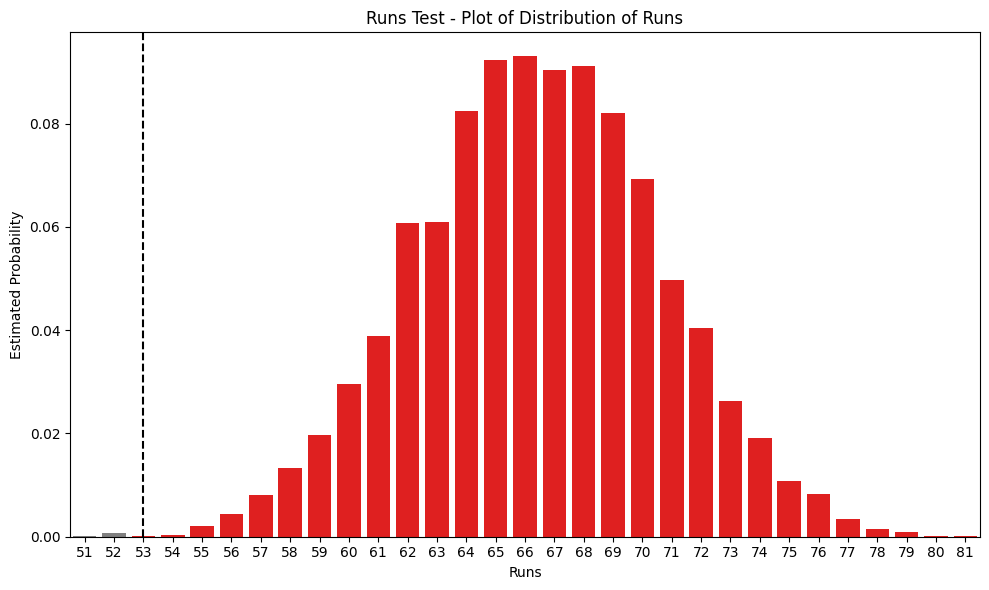

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # Define the vector of observed values
# x = np.array([5, 1, 2, 1, 5, 6, 8, 2, 4, 8, 9, 10, 4, 2])
mu = np.random.normal(0,1)
x = np.random.normal(mu, 1, 100)
# x = np.zeros(100)
# for i in range(99):
#     x[i+1] = x[i] + np.random.normal(0, 1)
x = np.array(x)

# Define a function to calculate the runs for an input vector
def RUNS(x):
    n = len(x)
    S = np.zeros(n-1, dtype=bool)
    for i in range(n-1):
        S[i] = x[i+1] >= x[i]
    return 1 + np.sum(S[:-1] != S[1:])

# Simulate the runs statistic for k permutations
k = 10**4
np.random.seed(None)
RR = np.zeros(k, dtype=int)
for i in range(k):
    x_perm = np.random.permutation(x)
    RR[i] = RUNS(x_perm)

# Generate the frequency table for the simulated runs
FREQS = pd.DataFrame({'RR': RR}).value_counts().reset_index(name='Freq')
# Calculate the p-value of the runs test
R = RUNS(x)
R_FREQ_vals = FREQS.loc[FREQS['RR'] == R, 'Freq'].values
if len(R_FREQ_vals) == 0:
    R_FREQ = 0
else:
    R_FREQ = R_FREQ_vals[0]
p = np.sum(FREQS['Freq'] * (FREQS['Freq'] <= R_FREQ)) / k
from src.utils import ecdf_inv

# p = np.mean(RR <= R)
print("p-value=", p)

# Plot estimated distribution of runs with test
plt.figure(figsize=(10, 6))
# Normalize the frequency by dividing by k
sns.barplot(x='RR', y=FREQS['Freq']/k, data=FREQS, 
            palette=['red' if freq <= R_FREQ else 'grey' for freq in FREQS['Freq']])
# Add vertical line at the observed runs value
plt.axvline(x=FREQS.index[FREQS['RR'] == R][0], color='black', linestyle='--')
plt.title('Runs Test - Plot of Distribution of Runs')
# plt.suptitle(f'(Observed runs is black line, p-value = {p:.5f})', fontsize=10, y=0.92)
plt.xlabel('Runs')
plt.ylabel('Estimated Probability')
# Remove legend
plt.tight_layout()
plt.show()

In [23]:
import yfinance as yf
# Define the ticker symbol for EUR/USD
ticker = 'EURUSD=X'

# Download historical data
data = yf.download(ticker, period='1d', interval='1m')

[*********************100%***********************]  1 of 1 completed


In [32]:
x = data['Close'].values[400:600]

In [4]:
import pandas as pd
import sqlite3

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("data/database.sqlite")
df = pd.read_sql_query("SELECT * from Player_Attributes", con)

# Verify that result of SQL query is stored in the dataframe
print(df.head())

con.close()

   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   ...  vision  penalties 

In [10]:
x = df["overall_rating"].values[0:10000]

In [18]:
df_date = df[df["date"] == df["date"].values[0]]
df_date

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
271,272,186561,75489,2016-02-18 00:00:00,82.0,85.0,right,high,high,75.0,...,81.0,75.0,62.0,74.0,68.0,6.0,11.0,5.0,10.0,8.0
1243,1244,112392,25571,2016-02-18 00:00:00,75.0,75.0,right,high,low,64.0,...,81.0,76.0,44.0,59.0,58.0,8.0,16.0,12.0,11.0,12.0
1278,1279,206161,293235,2016-02-18 00:00:00,73.0,78.0,left,high,high,73.0,...,59.0,48.0,69.0,73.0,73.0,10.0,11.0,6.0,13.0,13.0
1346,1347,221841,519835,2016-02-18 00:00:00,67.0,83.0,right,high,medium,45.0,...,48.0,68.0,20.0,17.0,21.0,10.0,13.0,13.0,12.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182738,182739,183512,80295,2016-02-18 00:00:00,73.0,75.0,left,medium,medium,75.0,...,45.0,59.0,77.0,76.0,78.0,12.0,13.0,9.0,8.0,11.0
183027,183028,232227,613255,2016-02-18 00:00:00,63.0,76.0,right,medium,medium,47.0,...,58.0,60.0,14.0,18.0,14.0,14.0,10.0,6.0,6.0,13.0
183133,183134,190196,143750,2016-02-18 00:00:00,70.0,72.0,right,medium,high,30.0,...,44.0,39.0,70.0,72.0,62.0,15.0,8.0,8.0,10.0,6.0
183269,183270,189655,89251,2016-02-18 00:00:00,65.0,66.0,right,medium,medium,47.0,...,41.0,49.0,22.0,22.0,18.0,11.0,7.0,10.0,7.0,6.0


In [21]:
x = df_date.vision.values

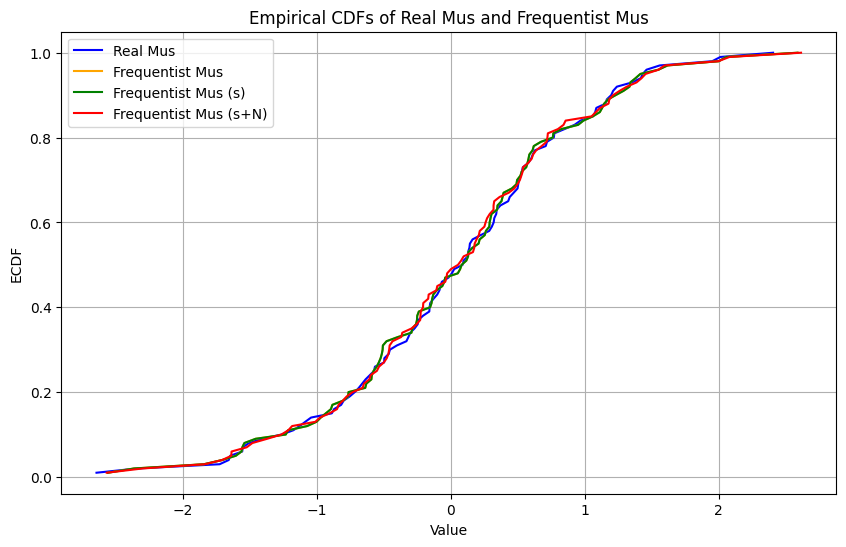

Wasserstein distance between normal distribution and itself: 0.0000
Wasserstein distance between real mus and normal distribution: 0.8516
Wasserstein distance between frequentist mus and normal distribution: 0.8683
Wasserstein distance between frequentist mus (s) and normal distribution: 0.8683
Wasserstein distance between frequentist mus (s+N) and normal distribution: 0.8686


In [36]:
from src.statistical_tests import exchangeability_test
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
s, N = 100, 100
n = s + N

iter = 100
real_mus = []
all_frequentist_mus = []
frequentist_mus = []
pr_mus = []

for _ in range(iter):
    # simulate exchangeable data x
    mu = np.random.normal(0, 1)
    x = np.random.normal(mu, 1, N)
    # 
    real_mus.append(mu)
    all_frequentist_mus.append(np.mean(x))
    frequentist_mus.append(np.mean(x[:s]))
    # Generating new data and updating mu_hat
    x = x[:s]
    mu_pr = np.mean(x)
    for _ in range(N):
        x = np.append(x, np.random.normal(mu_pr, 1))
        # computing mu_hat_pr based on data + simulated data
        mu_pr = np.mean(x)
    pr_mus.append(mu_pr)
    


# Computing Wasserstein distance between each ecdf and the normal distribution
def wasserstein_distance(x, y):
    """Compute the Wasserstein distance between two distributions."""
    return stats.wasserstein_distance(x, y)
def ecdf(data):
    """Compute the empirical cumulative distribution function (ECDF) of a dataset."""
    x = np.sort(data)
    n = len(data)
    y = np.arange(1, n + 1) / n
    return x, y

# Compute the ECDFs
x0 = stats.norm.cdf(np.arange(1, n+1)/n, loc=0, scale=1)
x1, y1 = ecdf(real_mus)
x2, y2 = ecdf(all_frequentist_mus)
x3, y3 = ecdf(frequentist_mus)
x4, y4 = ecdf(pr_mus)
# Compute the Wasserstein distances
wd0 = wasserstein_distance(x0, x0)
wd1 = wasserstein_distance(x1, x0)
wd2 = wasserstein_distance(x2, x0)
wd3 = wasserstein_distance(x3, x0)
wd4 = wasserstein_distance(x4, x0)
# Plot the ECDFs
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, label='Real Mus', color='blue')
plt.plot(x2, y2, label='Frequentist Mus', color='orange')
plt.plot(x3, y3, label='Frequentist Mus (s)', color='green')
plt.plot(x4, y4, label='Frequentist Mus (s+N)', color='red')
plt.title('Empirical CDFs of Real Mus and Frequentist Mus')
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.legend()
plt.grid()
plt.show()
# Print Wasserstein distances
print(f"Wasserstein distance between normal distribution and itself: {wd0:.4f}")
print(f"Wasserstein distance between real mus and normal distribution: {wd1:.4f}")
print(f"Wasserstein distance between frequentist mus and normal distribution: {wd2:.4f}")
print(f"Wasserstein distance between frequentist mus (s) and normal distribution: {wd3:.4f}")
print(f"Wasserstein distance between frequentist mus (s+N) and normal distribution: {wd4:.4f}")











In [ ]:
from typing import Callable
import numpy as np

def inverse_transform_sampling_numerical(
        cdf: Callable,
        x_min: float,
        x_max: float,
        size: int = 1000,
        num_points=10000,
):
    """Generate samples using numerical approximation of inverse CDF.
 
    Args:
        cdf: The cumulative distribution function
        x_min: Minimum value of the support
        x_max: Maximum value of the support
        size: Number of samples to generate
        num_points: Number of points for numerical approximation
    """
    # Create grid of x values
    x = np.linspace(x_min, x_max, num_points)

    # Compute CDF values
    cdf_values = cdf(x)
    cdf_values /= cdf_values[-1]  # Normalize to 1
    
    # Generate uniform random numbers
    u = np.random.uniform(size=size)
    
    # Inverse sampling by interpolation
    return np.interp(u, cdf_values, x)

Example of simulation from a given CDF

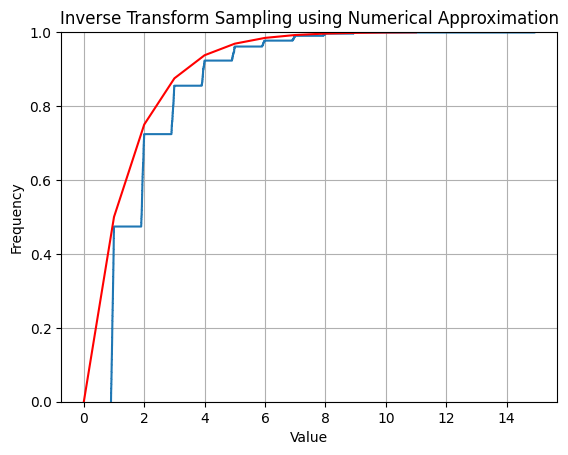

In [ ]:
from scipy.stats import norm, expon, geom
import numpy as np

cdf = lambda x: geom.cdf(x, p=0.5) 
x_min = 0
x_max = 1000
size = 1000
samples = inverse_transform_sampling_numerical(cdf, x_min, x_max, size)
import matplotlib.pyplot as plt
import seaborn as sns
sns.ecdfplot(samples)
plt.title('Inverse Transform Sampling using Numerical Approximation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [51]:
def rejection_sampling_weighted(x, lambda_func, lambda_max):
    while True:
        u = np.random.uniform(0, lambda_max)
        if u <= lambda_func(x):
            return x  # Accept the sample

Ignore: Trying to generate weighted exchangeable data

In [54]:
from typing import List
from functools import partial
def generate_exchageable_geom(size=1000):
    p = np.random.uniform(0, 1)
    x = np.random.geometric(p, size=size)
    return x

def lambda_seq(i, x):
    if x == i:
        return 1
    else:
        return 1/(i+1)

def generate_weighted_exchangeable_geom(size=1000, lambda_seq: Callable = lambda_seq):
    p = np.random.uniform(0, 1)
    x = np.random.geometric(p, size=size)
    y = np.zeros(size)
    for i in range(size):
        lam = lambda x: lambda_seq(i, x)
        y[i] = rejection_sampling_weighted(x[i], lam, lambda_max=1)
    return y

In [59]:
y = generate_weighted_exchangeable_geom(size=100)

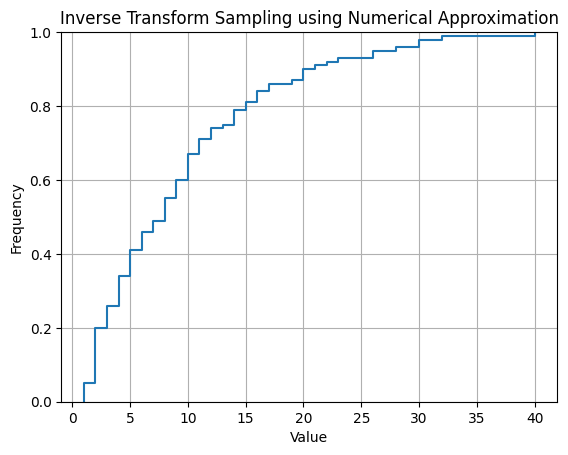

In [60]:
# plot ecdf of y
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.ecdfplot(y)
plt.title('Inverse Transform Sampling using Numerical Approximation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()